# 0716325 曾正豪

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import random

import matplotlib.pyplot as plt

## Data Generation
這邊，我使用for迴圈來執行1000次，每一次我會先去決定他的label y是0還1，接著將其放入題目規定的multivariate normal中產生x座標點並繪出

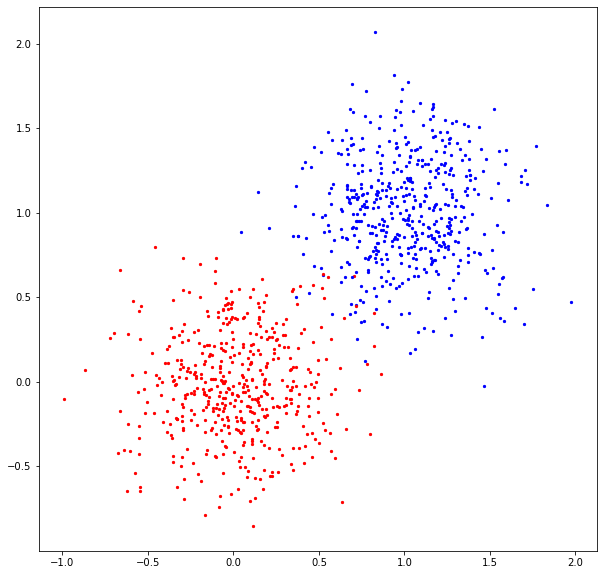

In [7]:
x = []
y = []
cov = [[0.1, 0], [0, 0.1]]
plt.figure(figsize=(10,10))
for i in range(1000):
    temp_y = random.randint(0, 1)
    mean = [temp_y, temp_y]
    temp_x = np.random.multivariate_normal(mean, cov)
    x.append(temp_x)
    y.append(temp_y)

    if temp_y == 0:
        plt.scatter(temp_x[0], temp_x[1], s=5, c = '#ff0000')
    else:
        plt.scatter(temp_x[0], temp_x[1], s=5, c = '#0000ff')
plt.show()


## Model Construction & Results
這邊我使用了sklearn的LogisticRegression，並使用整個資料集進行訓練  
訓練完畢之後，從中提取參數來得知模型的函數  
最後將整個資料集行預測來計算準確率

In [10]:
x = np.array(x)
y = np.array(y)

lr = LogisticRegression()
lr.fit(x, y)
print("yi = L(%.2f + %.2f × xi0 + %.2f × xi1)" % (lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]))

y_pred = lr.predict(x)
report = classification_report(y, y_pred)
print(report)

yi = L(-5.16 + 5.16 × xi0 + 5.15 × xi1)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       484
           1       0.98      0.99      0.98       516

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



## Bonus
我使用了linspace搭配meshgrid來產生座標平面上500*500的平均分布的座標點，並將這些座標點丟入模型中預測  
接著，使用pyplot的pcolormesh來繪製區域圖出來

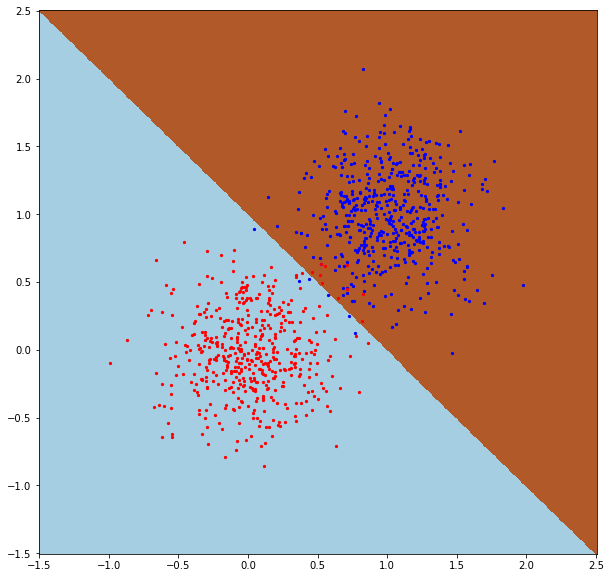

In [9]:
sample = 500
nx = np.linspace(-1.5, 2.5, sample)
ny = np.linspace(-1.5, 2.5, sample)
xv, yv = np.meshgrid(nx, ny)

plt.figure(figsize=(10,10))
z = lr.predict(np.c_[xv.ravel(), yv.ravel()])
z = z.reshape(xv.shape)
plt.pcolormesh(xv,yv,z, shading='auto', cmap=plt.cm.Paired)

for i in range(1000):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], s=5, c = '#ff0000')
    else:
        plt.scatter(x[i][0], x[i][1], s=5, c = '#0000ff')
plt.show()